In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext google.cloud.bigquery

**Number of merchants that can be tracked by GA at REG**

In [2]:
%%bigquery df_REG
SELECT 
  COUNT(DISTINCT gas.organization_uuid)
  #, gas.full_visitor_id , gas.session_id , gas.session_start_time , gas.session_end_time , gas.session_reached_minimal_created 
FROM `izettle-dp-pipeline-prod.legacy_views.google_analytics_session` gas
JOIN `izettle-dp-pipeline-prod.legacy_views.organization_customer` oc
    ON oc.organization_uuid = gas.organization_uuid 
WHERE oc.organization_created >= session_start_time 
    AND session_reached_minimal_created IS True

In [3]:
df_REG

,f0_
0,398902


**Number of merchants that can be tracked upto REG**

In [4]:
%%bigquery df_to_REG
SELECT 
  COUNT(DISTINCT gas.organization_uuid)
  #, gas.full_visitor_id , gas.session_id , gas.session_start_time , gas.session_end_time , gas.session_reached_minimal_created 
FROM `izettle-dp-pipeline-prod.legacy_views.google_analytics_session` gas
JOIN `izettle-dp-pipeline-prod.legacy_views.organization_customer` oc
    ON oc.organization_uuid = gas.organization_uuid 
WHERE oc.organization_created >= session_start_time 

In [5]:
df_to_REG

,f0_
0,408329


**Number of merchants that can be at least tracked**

In [6]:
%%bigquery df_track
SELECT 
  COUNT(DISTINCT gas.organization_uuid)
  #, gas.full_visitor_id , gas.session_id , gas.session_start_time , gas.session_end_time , gas.session_reached_minimal_created 
FROM `izettle-dp-pipeline-prod.legacy_views.google_analytics_session` gas

In [7]:
df_track

,f0_
0,996292


**Number of REG merchants since 2017-09-01**

In [8]:
%%bigquery reg
SELECT
    COUNT(DISTINCT organization_uuid)
FROM `izettle-dp-pipeline-prod.legacy_views.organization_customer`
WHERE organization_created >= '2017-09-01'

In [9]:
reg

,f0_
0,1128517


In [10]:
reg.iloc[0,0]

1128517

In [11]:
df = pd.DataFrame(np.array([reg.iloc[0,0], df_track.iloc[0,0], df_to_REG.iloc[0,0], df_REG.iloc[0,0]]),
                  columns=['nr'],
                  index = ['total', 'track', 'to_REG', 'at_REG'])

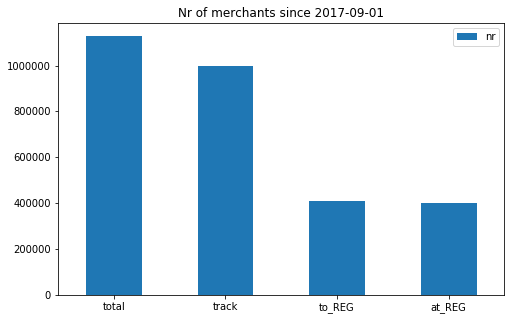

In [12]:
df.plot(kind = 'bar', rot = 0, figsize=(8,5))
plt.title('Nr of merchants since 2017-09-01')
plt.show()

In [13]:
df

,nr
total,1128517
track,996292
to_REG,408329
at_REG,398902


In [16]:
df['percent'] = df['nr']*100/df['nr'].iloc[0]

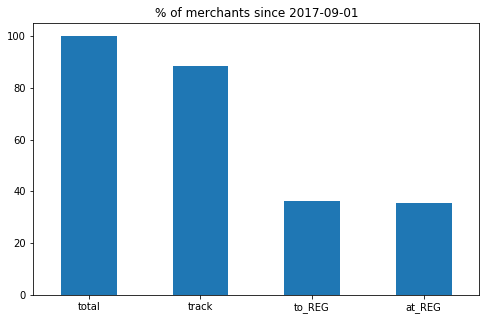

In [17]:
df['percent'].plot(kind = 'bar', rot = 0, figsize=(8,5))
plt.title('% of merchants since 2017-09-01')
plt.show()

In [18]:
df

,nr,percent
total,1128517,100.000000
track,996292,88.283296
to_REG,408329,36.182796
at_REG,398902,35.347452
